In [1]:
#import
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.set(style="whitegrid")
import copy
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=10)
from matplotlib.font_manager import FontProperties
#myfont = FontProperties(fname='/Library/Fonts/Songti.ttc')
sns.set(font=myfont.get_name())
r = lambda x:round(x,2)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.regression.linear_model import OLS
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def listdir(path = '.',contain = '', file_type = '.txt'):
    file_list = []
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.isdir(file_path):  
            continue 
        elif str(contain) in str(file_path) and file_path[-len(file_type):] == file_type:
            file_list.append(file_path)
    return file_list

In [3]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')

In [7]:
files = ['2_首组_K3_5000万_7_50_支_股票池.csv',
         '2_首组_K4_5000万_7_50_支_股票池.csv',
         '2_首组_K5_5000万_7_50_支_股票池.csv',
         '2_首组_K6_5000万_7_50_支_股票池.csv',
         '2_首组_K7_5000万_7_50_支_股票池.csv',
         ]

In [8]:
full_date = pd.DataFrame()
for i in files:
    full_date = pd.concat([full_date,pd.read_csv(open(i),index_col=0)['0']],axis=1)
dates = full_date.dropna().index.tolist()
full = {}
for j in dates:
    for i in files:
        if j in full.keys():
            full[j] += pd.read_csv(open(i),index_col=0).xs(j).dropna().tolist()
        else:
            full[j] = pd.read_csv(open(i),index_col=0).xs(j).dropna().tolist()
for i in files:
    print(i)
print('平均每日共有',round(np.mean([len(set(full[i])) for i in full.keys()])),'支')

2_首组_K3_5000万_7_50_支_股票池.csv
2_首组_K4_5000万_7_50_支_股票池.csv
2_首组_K5_5000万_7_50_支_股票池.csv
2_首组_K6_5000万_7_50_支_股票池.csv
2_首组_K7_5000万_7_50_支_股票池.csv
平均每日共有 110.0 支


In [9]:
full_chonghe = []
full_together = []
length = 0
for i in range(len(files)+1):
    for j in range(i+1,len(files)):
        print(i,j)
        f = open(files[i])
        data_1 = pd.read_csv(f,index_col=0)
        f = open(files[j])
        data_2 = pd.read_csv(f,index_col=0)
        dates_in_both = [dt for dt in data_1.index if dt in data_2.index]
        data_1 = data_1.loc[dates_in_both]
        data_2 = data_2.loc[dates_in_both]
        if len(dates_in_both) > length:
            length = len(dates_in_both)
        chonghe = []
        together = []
        for date in data_1.index:
            data_1_stock = data_1.xs(date).tolist()
            data_2_stock = data_2.xs(date).tolist()
            inall = len([stock for stock in data_1_stock if stock in data_2_stock])
            inone = len(list(set(data_1_stock + data_2_stock)))
            together.append(inone)
            chonghe.append(inall)
        full_chonghe.append([(files[i],files[j]),chonghe])
        full_together.append([(files[i],files[j]),together])

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


2_首组_K3_5000万_7_50_支_股票池.csv   --  2_首组_K4_5000万_7_50_支_股票池.csv 平均重合 24.0 支, 48.0 %
2_首组_K3_5000万_7_50_支_股票池.csv   --  2_首组_K5_5000万_7_50_支_股票池.csv 平均重合 21.5 支, 43.0 %
2_首组_K3_5000万_7_50_支_股票池.csv   --  2_首组_K6_5000万_7_50_支_股票池.csv 平均重合 21.5 支, 43.0 %
2_首组_K3_5000万_7_50_支_股票池.csv   --  2_首组_K7_5000万_7_50_支_股票池.csv 平均重合 19.0 支, 38.0 %
2_首组_K4_5000万_7_50_支_股票池.csv   --  2_首组_K5_5000万_7_50_支_股票池.csv 平均重合 35.5 支, 71.0 %
2_首组_K4_5000万_7_50_支_股票池.csv   --  2_首组_K6_5000万_7_50_支_股票池.csv 平均重合 23.0 支, 46.0 %
2_首组_K4_5000万_7_50_支_股票池.csv   --  2_首组_K7_5000万_7_50_支_股票池.csv 平均重合 23.0 支, 46.0 %
2_首组_K5_5000万_7_50_支_股票池.csv   --  2_首组_K6_5000万_7_50_支_股票池.csv 平均重合 25.0 支, 50.0 %
2_首组_K5_5000万_7_50_支_股票池.csv   --  2_首组_K7_5000万_7_50_支_股票池.csv 平均重合 24.0 支, 48.0 %
2_首组_K6_5000万_7_50_支_股票池.csv   --  2_首组_K7_5000万_7_50_支_股票池.csv 平均重合 39.0 支, 78.0 %


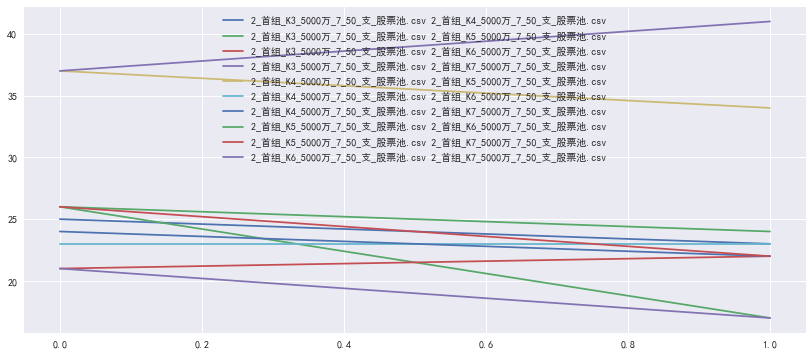

In [10]:
plt.figure(figsize = (14,6))
for i in range(len(full_chonghe)):
    plt.plot([np.nan] * (length - len(full_chonghe[i][1])) + full_chonghe[i][1],\
        label=full_together[i][0][0]+' '+full_together[i][0][1])
    print(full_chonghe[i][0][0]+'   --  '+full_chonghe[i][0][1],'平均重合',round(np.mean(full_chonghe[i][1]),2),'支,',\
          round(np.mean(full_chonghe[i][1])/50 * 100,2),'%')
plt.legend()
plt.show()

E1_5000万_7_50_支 E2_5000万_7_50_支 平均总数 66.88
E1_5000万_7_50_支 I2_5000万_7_50_支 平均总数 83.93
E1_5000万_7_50_支 _J2_5000万_7_50_支 平均总数 88.66
E1_5000万_7_50_支 E1_5000万_7_21_50-250_支_测试t 平均总数 92.05
E2_5000万_7_50_支 I2_5000万_7_50_支 平均总数 84.03
E2_5000万_7_50_支 _J2_5000万_7_50_支 平均总数 88.17
E2_5000万_7_50_支 E1_5000万_7_21_50-250_支_测试t 平均总数 91.99
I2_5000万_7_50_支 _J2_5000万_7_50_支 平均总数 78.83
I2_5000万_7_50_支 E1_5000万_7_21_50-250_支_测试t 平均总数 94.18
_J2_5000万_7_50_支 E1_5000万_7_21_50-250_支_测试t 平均总数 96.06


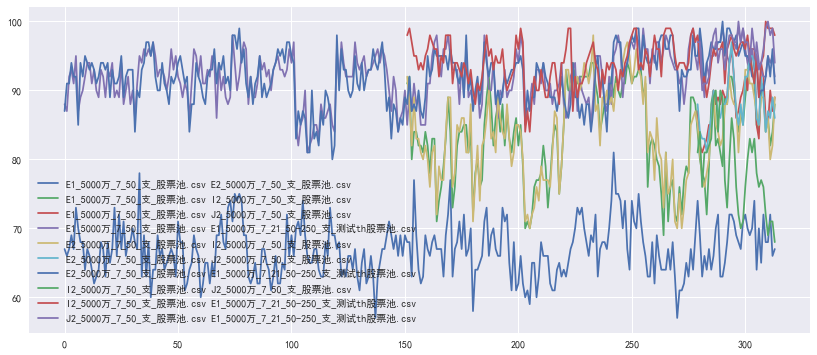

In [9]:
plt.figure(figsize = (14,6))
for i in range(len(full_together)):
    plt.plot([np.nan] * (length - len(full_together[i][1])) + full_together[i][1],\
        label=full_together[i][0][0].split('首组_')[-1].split('_原汁')[0]+' '+full_together[i][0][1].split('首组_')[-1].split('_原汁')[0])
    print(full_together[i][0][0][5:-8]+' '+full_together[i][0][1][5:-8],'平均总数',round(np.mean(full_together[i][1]),2))
plt.legend()
plt.show()